In [1]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, load_digits
from ML_With_Pytorch_Scikit_learn_Sebastian.ch02.plot_util import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

df_wine = load_wine(as_frame=True)
df_wine.frame
df_wine = pd.DataFrame(df_wine.frame)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

stdc = StandardScaler()
X_train_std = stdc.fit_transform(X_train)
X_test_std = stdc.transform(X_test)
len(X_test_std)

# To compute covariance matrix
cov_mat = np.cov(X_train_std.T)
# To perform eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("EigenValues \n", eigen_vals)

EigenValues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


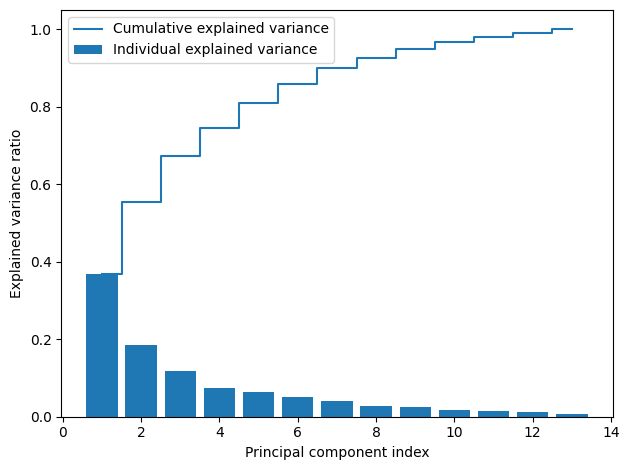

In [3]:
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align="center", label="Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [4]:
# An alternative way of getting variance ratio is like this
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [5]:
eigen_pairs = [
    (np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))
]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

# We select the two largest eigenvalues
# output: 13 x 2 dimensional projection matrix
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Matrix W: \n", W)
X_train_std[0].dot(W)
# Output 124 x 2
X_train_pca = X_train_std.dot(W)

Matrix W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


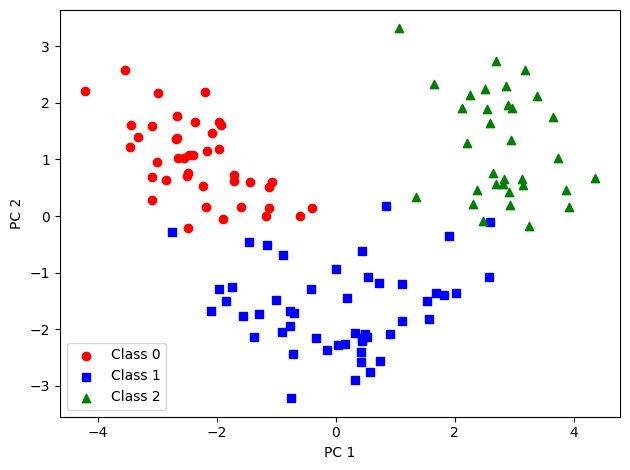

In [6]:
colors = ["r", "b", "g"]
markers = ["o", "s", "^"]
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train == l, 0],
        X_train_pca[y_train == l, 1],
        c=c,
        label=f"Class {l}",
        marker=m,
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

0 0
1 1
2 2


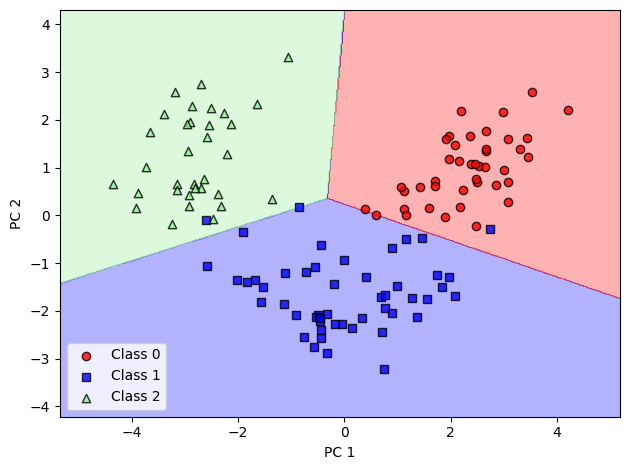

0 0
1 1
2 2


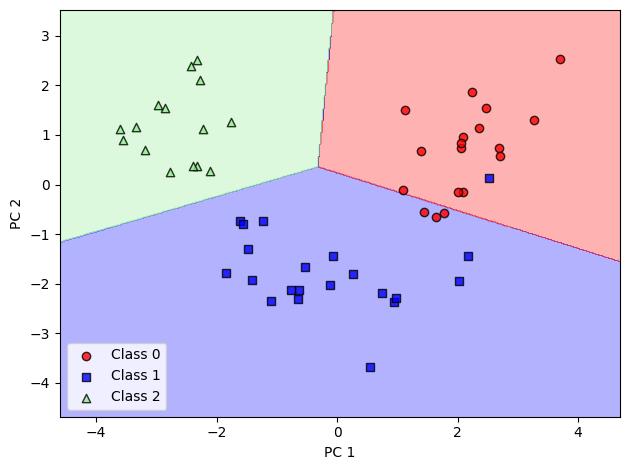

In [7]:
pca = PCA(n_components=2)
# Instead of defining ovr in the multiclass parameter of logisticRegression it's suggested to follow this strategy
lr = OneVsRestClassifier(LogisticRegression(random_state=1, solver="lbfgs"))

# Compress the data with PCA
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()
# For test data
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

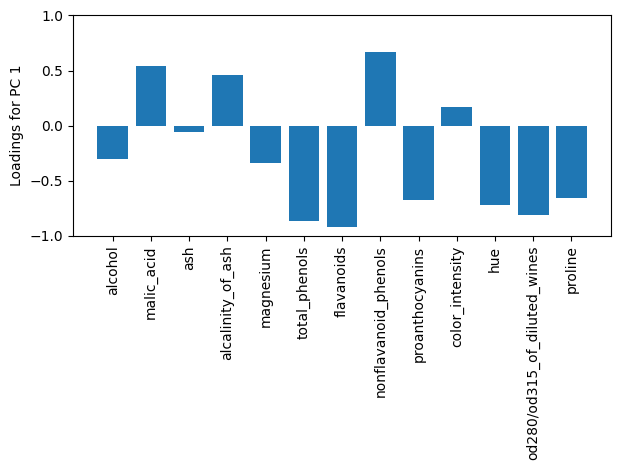

In [8]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()





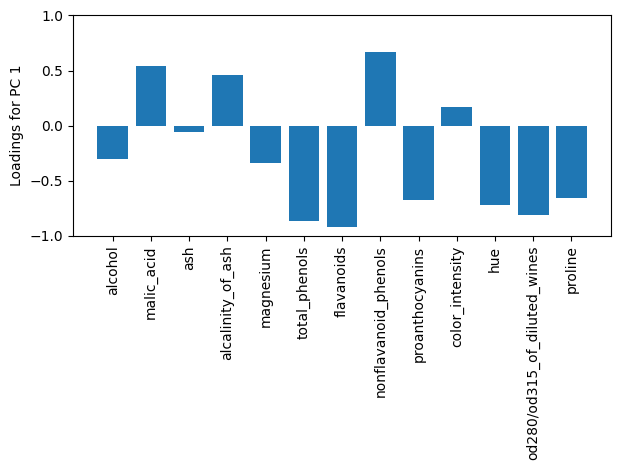

In [9]:

# An alternative way by calculating from pca scikit-learn
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# # %% [markdown]
# # # Numpy implementation of the LDA (Supervised method)
#
# # %%
# np.set_printoptions(precision=4)
# mean_vecs = []
# for label in range(0, 3):
#     mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
#     print(f'MV {label}: {mean_vecs[label]} \n')
# # number of features
# d = 13
# S_W = np.zeros((d,d))
# for label, mv in zip(range(0,3), mean_vecs):
#     class_scatter = np.zeros((d,d))
#     for row in X_train_std[y_train == label]:
#         row, mv = row.reshape(d, 1), mv.reshape(d, 1)
#         class_scatter += (row-mv).dot((row-mv).T)
#     S_W += class_scatter
# print('Within-class scatter matrix:' f'{S_W.shape[0]}x{S_W.shape[1]}')
# print("Class label distribution:", np.bincount(y_train)[:])
#
# d = 13 # number of features
# S_W = np.zeros((d, d))
# for label,mv in zip(range(1, 4), mean_vecs):
#     class_scatter = np.cov(X_train_std[y_train==label].T)
#     S_W += class_scatter
# print('Scaled within-class scatter matrix: ' f'{S_W.shape[0]}x{S_W.shape[1]}')
#
# mean_overall = np.mean(X_train_std, axis=0)
# mean_overall = mean_overall.reshape(d, 1)
# d = 13 # number of features
# S_B = np.zeros((d, d))
# for i, mean_vec in enumerate(mean_vecs):
#     n = X_train_std[y_train == i + 1, :].shape[0]
#     mean_vec = mean_vec.reshape(d, 1) # make column vector
#     S_B += n * (mean_vec - mean_overall).dot(
#     (mean_vec - mean_overall).T)
# print('Between-class scatter matrix: '
# f'{S_B.shape[0]}x{S_B.shape[1]}')
#
# # %%
# eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True)
# print("Eigenvalues in descending order: \n")
# for eigen_val in eigen_pairs:
#     print(eigen_val[0])

0 0
1 1
2 2


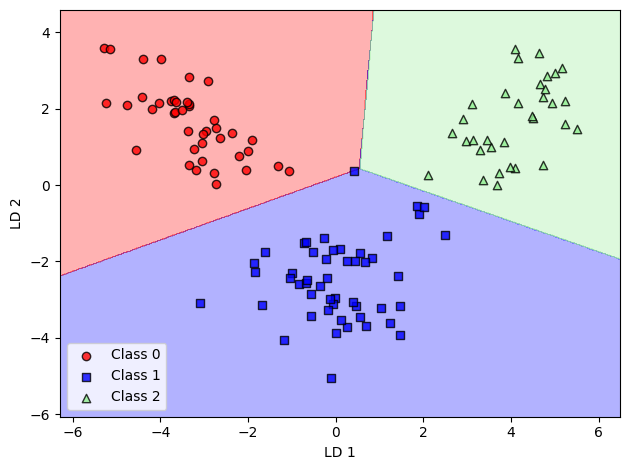

0 0
1 1
2 2


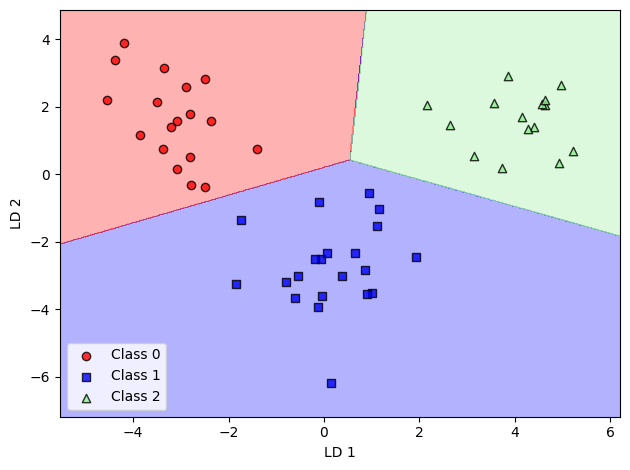

In [10]:
#  LDA via Scikit-learn
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = OneVsRestClassifier(LogisticRegression(random_state=1, solver='lbfgs'))
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()
# for test subset
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# T-SNE (Non linear dimension reduction)



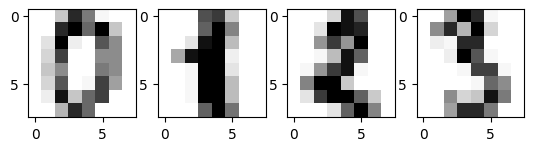

In [11]:
digits = load_digits()
digits
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

y_digits = digits.target
X_digits = digits.data

# With this code we projected 64 dimensional dataset onto 2 dimensional space
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

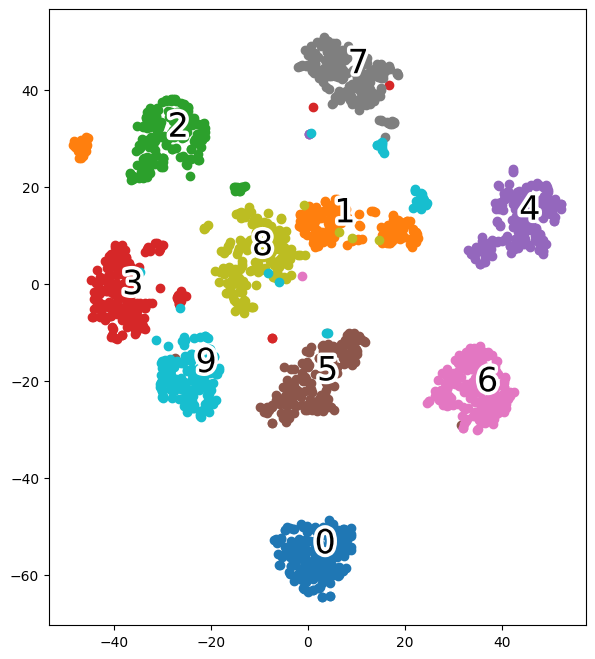

In [12]:
def plot_projection(x, colors):

    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0], x[colors == i, 1])

    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext,ytext,str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()